In [6]:
from rdkit.Chem import rdFMCS as MCS
from rdkit.Chem import MolFromSmarts

def moldiff(template, query):
    """Compare the two rdkit molecules.
    :param template: template molecule
    :param query: query molecule
    :return: list of modified atoms in query, list of modified bonds in query
    """
    r = MCS.FindMCS([template, query])
    substructure = MolFromSmarts(r.smartsString)
    raw_match = query.GetSubstructMatches(substructure)
    template_match = template.GetSubstructMatches(substructure)
    # flatten it
    match = list(raw_match[0])
    template_match = list(template_match[0])

    # need to invert match to get diffs
    inv_match = [i for i in range(query.GetNumAtoms()) if i not in match]

    # get bonds
    bond_match = []
    for b in query.GetBonds():
        if b.GetBeginAtomIdx() in inv_match or b.GetEndAtomIdx() in inv_match:
            bond_match.append(b.GetIdx())

    # now get bonding changes from deletion

    def neigh_hash(a):
        return "".join(sorted([n.GetSymbol() for n in a.GetNeighbors()]))

    for ti, qi in zip(template_match, match):
        if neigh_hash(template.GetAtomWithIdx(ti)) != neigh_hash(
            query.GetAtomWithIdx(qi)
        ):
            inv_match.append(qi)

    return inv_match, bond_match

In [13]:
from rdkit.Chem import MolFromSmiles
from evomol.molgraphops.molgraph import MolGraph

In [31]:
mol1 = MolFromSmiles("CC(=O)NC1=CC=C(C=C1)O")
mol2 = MolFromSmiles("C(=N)C(=O)NC1=CN=C(C=C1)")

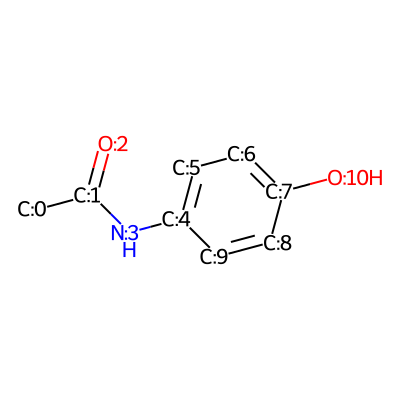

In [32]:
MolGraph(mol1).draw(show=False, at_idx=True, size=400)

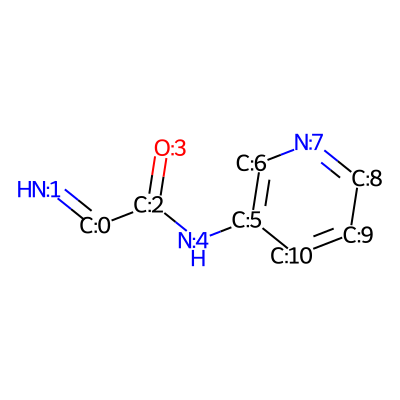

In [33]:
MolGraph(mol2).draw(show=False, at_idx=True, size=400)

In [34]:
moldiff(mol2, mol1)

([6, 10, 0, 5, 7], [5, 6, 9])

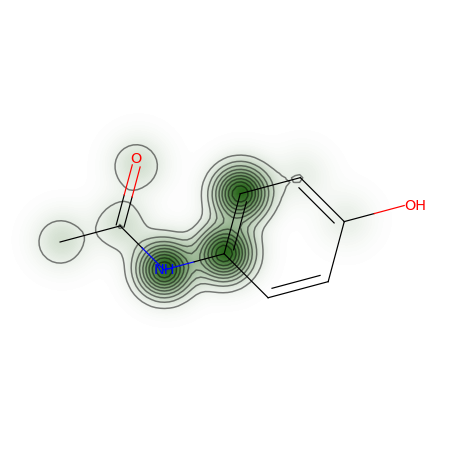

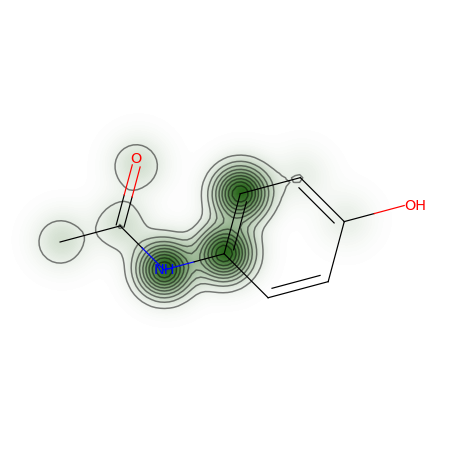

In [49]:
from rdkit.Chem.Draw.SimilarityMaps import GetSimilarityMapFromWeights

weights = []
for i in range(mol1.GetNumAtoms()):
    if i < 3:
        weights.append(0.1)
    elif i < 6:
        weights.append(0.05)
    elif i < 8:
        weights.append(0.005)
    else:
        weights.append(0)

GetSimilarityMapFromWeights(mol1, weights=weights)